In [33]:
import os
os.environ["TF_MIN_CPP_LEVEL_LOG"] = "2"
import cv2
import time
import random
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from pathlib import Path

In [34]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

tf.__version__

'2.5.0'

In [58]:
DATADIR = '../Dataset'
CATEGORIES = ['apple','lemon','kiwi','limes','apple_stale','lemon_stale','kiwi_stale']
IMG_SIZE = 128

In [59]:
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
     
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

training_data = create_training_data()

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [01:30<00:00,  8.81it/s]


In [60]:
print(f"data numbers: {len(training_data)}")
random.shuffle(training_data)
#for sample in training_data:
    #print( sample[1],end=" ")

data numbers: 5600


In [61]:
training_data[0][1]

2

In [62]:
X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0

Y = np.array(Y)
#X.shape
Y.shape

(5600,)

In [63]:
# # set up image augmentation
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     #zoom_range=0.3
#     )
# datagen.fit(X)

In [64]:
X.shape

(5600, 128, 128, 3)

In [65]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.4))

#model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
#model.add(AveragePooling2D())
#model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=7, activation = 'softmax')) #unit:分类数量

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model.summary()

In [66]:
history = model.fit(X, Y, batch_size=32, epochs=45, validation_split=0.3)
#model.fit_generator(datagen.flow(X, Y, batch_size=32),
                  #epochs=100,
                   #verbose=1)


Epoch 1/45
123/123 [==============================] - 12s 95ms/step - loss: 1.4055 - accuracy: 0.4029 - val_loss: 0.5698 - val_accuracy: 0.6919
Epoch 2/45
123/123 [==============================] - 12s 94ms/step - loss: 0.4249 - accuracy: 0.8073 - val_loss: 0.2600 - val_accuracy: 0.8971
Epoch 3/45
123/123 [==============================] - 12s 94ms/step - loss: 0.2606 - accuracy: 0.8890 - val_loss: 0.4330 - val_accuracy: 0.8334
Epoch 4/45
123/123 [==============================] - 12s 94ms/step - loss: 0.1701 - accuracy: 0.9326 - val_loss: 0.4842 - val_accuracy: 0.8703
Epoch 5/45
123/123 [==============================] - 12s 94ms/step - loss: 0.1475 - accuracy: 0.9472 - val_loss: 0.4432 - val_accuracy: 0.8465 0.1178 - accuracy:  - ETA: 1s - loss: 0.1365 - accura - ETA: 1s - loss:
Epoch 6/45
123/123 [==============================] - 12s 95ms/step - loss: 0.1391 - accuracy: 0.9434 - val_loss: 0.0985 - val_accuracy: 0.9613
Epoch 7/45
123/123 [==============================] - 12s 94ms/s

In [67]:
model.save('../Models/ai_fruit_912-1.h5')

In [70]:
# 单个测试样本数据
test_path = "../Images/test7.jpg"
image = cv2.imread(test_path)
#image = cv2.resize(image, (64, 64))
image = cv2.resize(image, (128, 128))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_bn = image.astype("float32") / 255.0
image = np.expand_dims(image, axis=0)
image_bn = np.expand_dims(image_bn, axis=0)

In [71]:
# 恢复 keras 模型，并预测
keras_file = '../Models/ai_fruit_912-1.h5'
model = tf.keras.models.load_model(keras_file)
# model.summary()
# tf.autograph.set_verbosity(0)

start_time = time.time()
pred = model.predict(image_bn)
stop_time = time.time()

print(f"prediction: {pred}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize(keras_file)/1024/1024))

prediction: [[1.3632167e-07 1.0187909e-04 5.6755625e-06 4.4356318e-07 4.0705083e-05
  7.5915627e-06 9.9984360e-01]]
time: 79.005ms
model size: 7.59 MB


In [72]:
# quantize int

def representative_data_gen():
  for input_value in X[:100]:
    input_value = np.expand_dims(input_value, axis=0)
    input_value = input_value.astype(np.float32)
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()

tflite_file = Path("../Models/Tflites/ai_fruit_912-1.tflite")
tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\1\AppData\Local\Temp\tmp_5l945rd\assets


INFO:tensorflow:Assets written to: C:\Users\1\AppData\Local\Temp\tmp_5l945rd\assets


667832

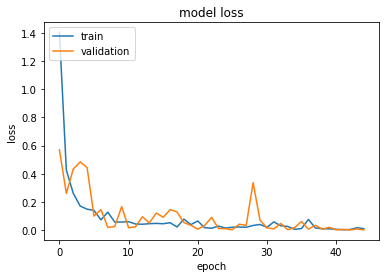

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

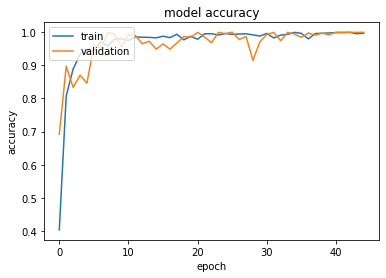

In [74]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [75]:
# plot_model(model, to_file='model_small.png', show_layer_names=False, show_shapes=True)

In [76]:
print(X[:100].shape)

(100, 128, 128, 3)


In [77]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


In [78]:
# tflite 模型推理
tflite_file = Path("../Models/Tflites/ai_fruit_912-1.tflite")
interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

interpreter.set_tensor(input_details['index'], image)

start_time = time.time()
interpreter.invoke()
stop_time = time.time()

output_data = interpreter.get_tensor(output_details['index'])
print(f"prediction: {output_data}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize(tflite_file)/1024/1024))

prediction: [[  0   0   0   0   0   0 255]]
time: 71.015ms
model size: 0.64 MB
